# Mercedes CCLASS Dataset Using TPOT
**By: Amr Ezzat**

## IMPORT RESOURCES

In [5]:
import tpot
from tpot import TPOTRegressor
import xgboost 
# Importing ML Packages
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from __future__ import print_function

# Load EDA packages
import pandas as pd
import numpy as np

In [6]:
# Fetching dataset 
cd = pd.read_csv('/Users/home/Documents/Downloads/cclass.csv', engine ='python')

In [7]:
cd.head()

,model,year,price,transmission,mileage,fuelType,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,1.5
2,C Class,2020,37899,Automatic,500,Diesel,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,2.0


In [8]:
#Checking Number of columns and rows are correct
print ("Rows     : " ,cd.shape[0])
print ("Columns  : " ,cd.shape[1])

Rows     :  3899
Columns  :  7


In [9]:
#Check the data type of variables (Only Numerical values are accepted by TPOT)
cd.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
engineSize      float64
dtype: object

## DATA PREPARATION

In [10]:
# Coverting catigorical values
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = ['transmission', 'fuelType']
column_trans = make_column_transformer((OrdinalEncoder(), categorical_columns))

c_transformed=column_trans.fit_transform(cd)

In [11]:
cd_trans = cd.copy()
cd_trans = pd.DataFrame(c_transformed, columns=categorical_columns)

In [12]:
cd.update(cd_trans)

In [13]:
cd

,model,year,price,transmission,mileage,fuelType,engineSize
0,C Class,2020,30495,0,1200,0,2.0
1,C Class,2020,29989,0,1000,3,1.5
2,C Class,2020,37899,0,500,0,2.0
3,C Class,2019,30399,0,5000,0,2.0
4,C Class,2019,29899,0,4500,0,2.0
...,...,...,...,...,...,...,...
3894,C Class,2017,14700,1,31357,0,1.6
3895,C Class,2018,18500,0,28248,0,2.1
3896,C Class,2014,11900,1,48055,0,2.1
3897,C Class,2014,11300,0,49865,0,2.1


In [14]:
cd.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
engineSize      0
dtype: int64

In [15]:
# transmission and fuelType data type changed successfully. 
cd.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
engineSize      float64
dtype: object

In [16]:
cd.iloc[:, 3] = pd.to_numeric(cd.iloc[:, 3], errors='coerce') 
cd.iloc[:, 5] = pd.to_numeric(cd.iloc[:, 5], errors='coerce') 

In [17]:
# transmission and fuelType data type changed successfully. 
cd.dtypes

model            object
year              int64
price             int64
transmission    float64
mileage           int64
fuelType        float64
engineSize      float64
dtype: object

In [18]:
# Checking for missing data
cd.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
engineSize      0
dtype: int64

In [19]:
# Arrange data (Remove 'model' and 'price', set 'price' as the value we want to predict)
X = cd.drop("price", axis=1)
X = X.drop("model", axis=1)
y = cd['price']

## TRAIN TEST SPLIT

In [20]:
# Splitting data 80% training data 20% test data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2)

In [21]:
# Checking the split was done properly
X_train

,year,transmission,mileage,fuelType,engineSize
1601,2019,3.0,7050,3.0,2.0
643,2016,0.0,39924,0.0,1.6
2979,2013,0.0,41866,3.0,6.2
116,2016,3.0,23090,0.0,2.1
2123,2019,3.0,8912,0.0,2.0
...,...,...,...,...,...
1695,2014,3.0,31273,3.0,2.0
973,2016,3.0,18998,3.0,2.0
451,2017,3.0,22424,0.0,2.1
749,2019,0.0,6655,3.0,2.0


## TPOT

In [23]:
tpot =  TPOTRegressor(max_time_mins = 60, verbosity=2, random_state = 45, scoring='neg_mean_absolute_error')
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))


Generation 1 - Current best internal CV score: -2035.4462201690626

Generation 2 - Current best internal CV score: -2018.5819233655839

Generation 3 - Current best internal CV score: -2018.5819233655839

Generation 4 - Current best internal CV score: -2001.3698592546152

Generation 5 - Current best internal CV score: -2000.3200782494757

Generation 6 - Current best internal CV score: -1983.785195424704

Generation 7 - Current best internal CV score: -1983.785195424704

Generation 8 - Current best internal CV score: -1983.785195424704

Generation 9 - Current best internal CV score: -1983.785195424704

Generation 10 - Current best internal CV score: -1983.785195424704

Generation 11 - Current best internal CV score: -1983.785195424704

Generation 12 - Current best internal CV score: -1963.6552827398802

60.04 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: Gradient

In [24]:
# Evaluating the model on the test set calling the score function  
print(tpot.score(X_test, y_test))

-1898.7214722346655


In [25]:
tpot.fitted_pipeline_

Pipeline(steps=[('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.85, loss='lad', max_depth=6,
                                           max_features=0.55,
                                           min_samples_leaf=2,
                                           min_samples_split=4, random_state=45,
                                           subsample=0.8500000000000001))])

## VISUAL RESULT 

In [26]:
exctracted_best_model = tpot.fitted_pipeline_.steps[-1][1]

In [27]:
exctracted_best_model.fit(X_train, y_train) 

GradientBoostingRegressor(alpha=0.85, loss='lad', max_depth=6,
                          max_features=0.55, min_samples_leaf=2,
                          min_samples_split=4, random_state=45,
                          subsample=0.8500000000000001)

In [28]:
# Getting feature importance
arr=exctracted_best_model.feature_importances_
arr

array([0.32299415, 0.0372087 , 0.43816577, 0.04659408, 0.1550373 ])

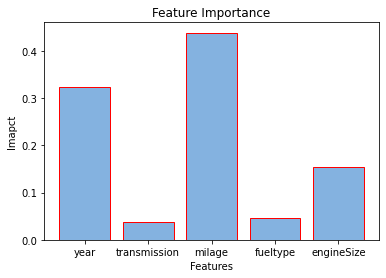

In [29]:
# Print feature importance using matpotlib
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
 
# Create dataset
height = arr;
bars = ('year', 'transmission', 'milage', 'fueltype','engineSize')
x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(x_pos, height, color = (0.2, 0.5, 0.8, 0.6), edgecolor='red')
 
# Add title and axis names
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Imapct')
 
# Create names on the x axis
plt.xticks(x_pos, bars)
 
# Show graph
plt.show()

In [30]:
# Export Python Code
tpot.export('tpot_cclass_pipeline.py')